<b>House Price Prediction</b><br>
ML model built using linear regression and gradient descent function.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
x = np.array([1350, 4500, 670, 1864, 980, 5595, 5854]) # size of houses(in sq.feet)
y = np.array([250, 440, 123, 295, 142, 533, 580])  # price of houses(in thousands)
print(f"Array of size of houses: {x}")
print(f"Array of price of houses: {y}")

Array of size of houses: [1350 4500  670 1864  980 5595 5854]
Array of price of houses: [250 440 123 295 142 533 580]


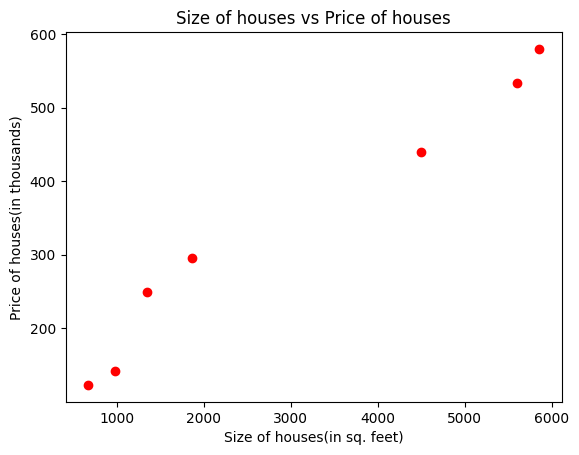

In [3]:
plt.scatter(x, y, c='r')
plt.title("Size of houses vs Price of houses")
plt.xlabel("Size of houses(in sq. feet)")
plt.ylabel("Price of houses(in thousands)")
plt.show()

In [4]:
w = 0.1
b = 20
print(f"For our prediction function f(x) = wx + b, w is {w} and b is {b}.")

For our prediction function f(x) = wx + b, w is 0.1 and b is 20.


In [5]:
def compute_model_output(x, w, b):
    output_arr = np.zeros(len(x))
    for i in range(len(x)):
        output_arr[i] = w*x[i] + b
    return output_arr

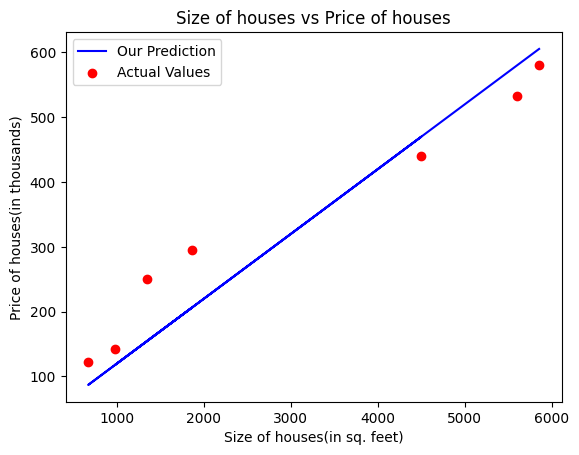

In [6]:
new_arr = compute_model_output(x, w, b)
plt.plot(x, new_arr, c='b', label="Our Prediction")
plt.scatter(x, y, c='r', label="Actual Values")
plt.title("Size of houses vs Price of houses")
plt.xlabel("Size of houses(in sq. feet)")
plt.ylabel("Price of houses(in thousands)")
plt.legend()
plt.show()

In [7]:
def compute_cost(x, y, w, b):
    total_cost = 0
    for i in range(len(x)):
        f = w*x[i]+b
        cost = (f-y[i])**2
        total_cost += cost
    total_cost = (1/2*len(x))*total_cost
    return total_cost
cost_wb = compute_cost(x, y, w, b)
print(f"For the given values of w and b, the cost is: {cost_wb}")

For the given values of w and b, the cost is: 78590.295


In [8]:
def compute_gradient(x, y, w, b):
    dj_dw = 0
    dj_db = 0
    for i in range(len(x)):
        f = w*x[i]+b
        djdw_i = (f-y[i])*x[i]
        djdb_i = (f-y[i])
        dj_dw += djdw_i
        dj_db += djdb_i
    dj_dw = (1/len(x))*dj_dw
    dj_db = (1/len(x))*dj_db
    return dj_dw, dj_db

In [9]:
def gradient_descent(x, y, w, b, alpha, no_of_iterations, cost_func, gradient_func):
    J_history = []
    p_history = []
    
    for i in range(no_of_iterations):
        dj_dw, dj_db = gradient_func(x, y, w , b)
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw
        if i<100000: 
            J_history.append( cost_func(x, y, w , b))
            p_history.append([w,b])
        if i%math.ceil(no_of_iterations/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ", f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ", f"w: {w: 0.3e}, b:{b: 0.5e}")
    return w, b, J_history, p_history

In [10]:
w = 0
b = 0
no_of_iterations = 1000
alpha = 0.1e-6
w_final, b_final, J_values, parameter_values = gradient_descent(x, y, w, b, alpha, no_of_iterations, compute_cost, compute_gradient)
print(f"Final values of w and b are {w_final} and {b_final}, respectively.")

Iteration    0: Cost 4.58e+05  dj_dw: -1.352e+06, dj_db: -3.376e+02   w:  1.352e-01, b: 3.37571e-05
Iteration  100: Cost 1.07e+05  dj_dw:  7.509e-03, dj_db: -3.338e+01   w:  1.023e-01, b: 3.60193e-04
Iteration  200: Cost 1.07e+05  dj_dw:  7.509e-03, dj_db: -3.338e+01   w:  1.023e-01, b: 6.94034e-04
Iteration  300: Cost 1.07e+05  dj_dw:  7.509e-03, dj_db: -3.338e+01   w:  1.023e-01, b: 1.02787e-03
Iteration  400: Cost 1.07e+05  dj_dw:  7.509e-03, dj_db: -3.338e+01   w:  1.023e-01, b: 1.36171e-03
Iteration  500: Cost 1.07e+05  dj_dw:  7.509e-03, dj_db: -3.338e+01   w:  1.023e-01, b: 1.69555e-03
Iteration  600: Cost 1.07e+05  dj_dw:  7.509e-03, dj_db: -3.338e+01   w:  1.023e-01, b: 2.02939e-03
Iteration  700: Cost 1.07e+05  dj_dw:  7.509e-03, dj_db: -3.338e+01   w:  1.023e-01, b: 2.36322e-03
Iteration  800: Cost 1.07e+05  dj_dw:  7.509e-03, dj_db: -3.338e+01   w:  1.023e-01, b: 2.69706e-03
Iteration  900: Cost 1.07e+05  dj_dw:  7.509e-03, dj_db: -3.338e+01   w:  1.023e-01, b: 3.03089e-03


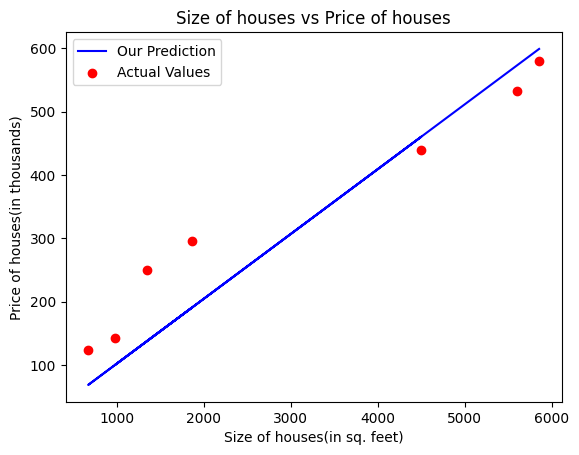

In [11]:
new_arr = compute_model_output(x, w_final, b_final)
plt.plot(x, new_arr, c='b', label="Our Prediction")
plt.scatter(x, y, c='r', label="Actual Values")
plt.title("Size of houses vs Price of houses")
plt.xlabel("Size of houses(in sq. feet)")
plt.ylabel("Price of houses(in thousands)")
plt.legend()
plt.show()

In [12]:
def linear_function(house_size):
    house_price = w_final*house_size + b_final
    return house_price

query_house_size = int(input("Enter size of your house: "))
query_house_price = linear_function(query_house_size)
print(f"Price of {query_house_size} sq. feet of house is {query_house_price:0.3f} thousand.")

Enter size of your house:  2563


Price of 2563 sq. feet of house is 262.214 thousand.
